In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
stocks = pd.read_csv('../data/SP100/stocks.csv').set_index('Symbol')
stocks.head(n=10)

,Name,Sector
Symbol,,
AAPL,Apple Inc.,Information Technology
ABBV,AbbVie,Health Care
ABT,Abbott Laboratories,Health Care
ACN,Accenture,Information Technology
ADBE,Adobe Inc.,Information Technology
AIG,American International Group,Financials
AMD,Advanced Micro Devices,Information Technology
AMGN,Amgen,Health Care
AMT,American Tower,Real Estate


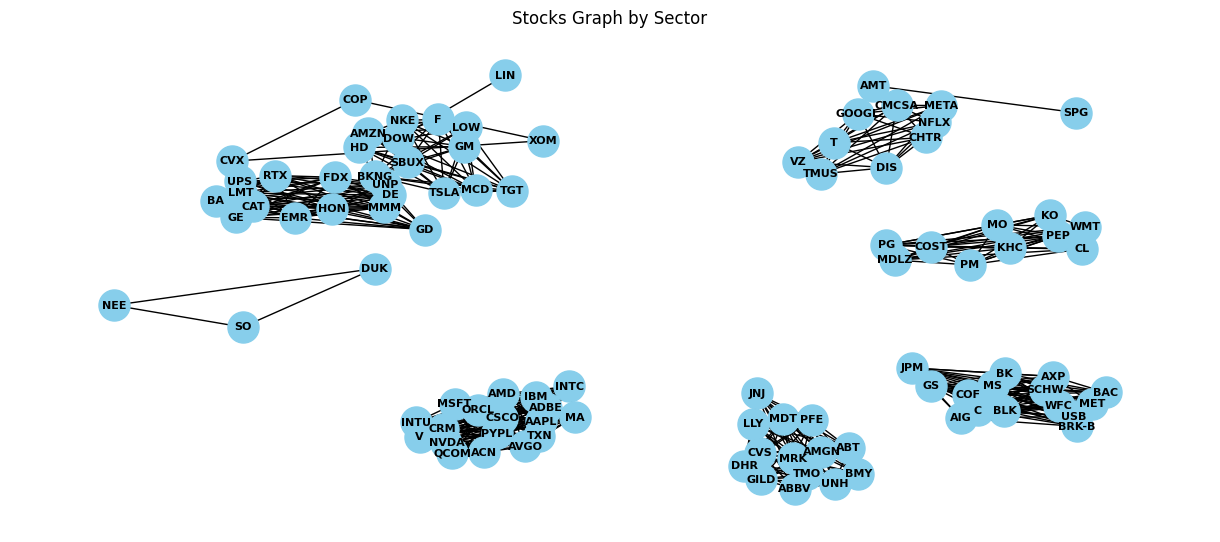

In [5]:
# Stocks by sector
adj_stocks = np.array([
	[stocks.loc[stock1, 'Sector'] == stocks.loc[stock2, 'Sector'] * (stock1 != stock2) for stock1 in stocks.index] for stock2 in stocks.index
]).astype(int)
stocks_graph = nx.from_numpy_array(adj_stocks)
stocks_graph = nx.relabel_nodes(stocks_graph, dict(enumerate(stocks.index)))

plt.figure(figsize=(12, 5))
nx.draw(stocks_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(stocks_graph, k=.5))
plt.title('Stocks Graph by Sector')
plt.show()

### Graph by Fundamentals Correlation

In [6]:
fundamentals = pd.read_csv('../data/SP100/fundamentals.csv').set_index("Symbol")
fundamentals.head(n=10)

,marketCap,trailingPE,forwardPE,priceToBook,trailingEps,forwardEps,bookValue,payoutRatio,beta,fiveYearAvgDividendYield,52WeekChange,averageVolume,enterpriseToRevenue,profitMargins
Symbol,,,,,,,,,,,,,,
AAPL,5.012003,0.011684,0.070928,2.443345,-0.218927,-0.209777,-0.100823,-0.212191,0.713554,-1.017199,0.181614,1.271806,0.884289,0.653144
ABBV,-0.120958,0.190301,-0.214429,1.721942,-0.412829,-0.033784,-0.100832,0.372491,-0.923289,1.050662,-0.248670,-0.261666,0.299419,-0.484589
ABT,-0.279678,-0.057194,-0.077565,-0.279694,-0.387985,-0.354902,-0.100385,-0.065539,-0.638734,-0.410391,-0.503112,-0.294606,-0.029056,-0.116685
ACN,-0.238842,-0.086659,-0.012565,-0.148082,0.105858,0.055594,-0.099875,-0.126385,0.726606,-0.581240,-0.503112,-0.390816,-0.315851,-0.332536
ADBE,-0.268165,-0.026259,-0.109561,0.126647,0.160393,0.354138,-0.100162,-0.259920,0.867579,-1.311766,-1.359475,-0.361771,1.220413,0.777887
AIG,-0.500745,-0.251373,-0.271956,-0.451706,-0.282551,-0.283492,-0.099276,-0.170443,0.267142,0.161069,-0.354430,-0.334624,-0.797475,-1.572254
AMD,-0.264595,0.702816,-0.024218,-0.337046,-0.518869,-0.357667,-0.100107,-0.259920,1.930090,-1.382463,-0.929957,0.820964,0.626556,-0.616275
AMGN,-0.356248,-0.058674,-0.235459,0.343213,-0.113493,0.359666,-0.100589,0.075872,-0.959837,0.367266,-0.713692,-0.373892,0.180878,-0.193058
AMT,-0.433763,0.065405,0.036800,0.600338,-0.336480,-0.279806,-0.100731,0.208104,-0.325463,0.043242,-0.860355,-0.395766,1.443348,-0.429121


In [7]:
def get_clusters(data: np.ndarray, n_clusters: int) -> np.ndarray:
    kmeans = KMeans(n_clusters=n_clusters)
    return kmeans.fit(data).labels_

In [8]:
fundamentals_corr = fundamentals.transpose().corr(method="spearman")
fundamentals_corr = (fundamentals_corr - (fundamentals_corr == 1))  # Remove self-correlation
fundamentals_corr.head(n=10)

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,-0.164835,0.090110,-0.213187,0.120879,-0.604396,0.389011,-0.437363,-0.178022,0.674725,...,-0.076923,-0.340659,-0.226374,-0.643956,-0.380220,0.507692,-0.362637,-0.050549,0.252747,-0.287912
ABBV,-0.164835,0.000000,0.393407,-0.239560,-0.169231,0.063736,-0.147253,0.828571,0.771429,-0.292308,...,0.094505,0.230769,-0.147253,0.204396,-0.191209,-0.186813,0.415385,-0.507692,0.072527,-0.019780
ABT,0.090110,0.393407,0.000000,0.015385,0.200000,-0.226374,0.367033,0.292308,0.551648,-0.059341,...,0.323077,0.169231,0.050549,-0.204396,-0.169231,0.125275,0.090110,-0.463736,0.094505,-0.265934
ACN,-0.213187,-0.239560,0.015385,0.000000,0.542857,0.406593,0.397802,-0.068132,0.138462,-0.002198,...,-0.191209,0.432967,0.318681,0.459341,-0.283516,-0.028571,-0.419780,-0.389011,-0.204396,-0.037363
ADBE,0.120879,-0.169231,0.200000,0.542857,0.000000,-0.169231,0.279121,0.156044,0.287912,-0.336264,...,0.305495,-0.134066,0.824176,0.015385,-0.142857,0.476923,-0.828571,-0.428571,-0.714286,-0.595604
AIG,-0.604396,0.063736,-0.226374,0.406593,-0.169231,0.000000,0.230769,0.054945,0.230769,-0.098901,...,0.063736,0.098901,0.010989,0.903297,0.472527,-0.819780,0.397802,0.221978,-0.169231,0.503297
AMD,0.389011,-0.147253,0.367033,0.397802,0.279121,0.230769,0.000000,-0.327473,0.265934,0.529670,...,0.032967,-0.094505,-0.054945,0.107692,-0.076923,-0.243956,-0.059341,-0.191209,0.010989,-0.019780
AMGN,-0.437363,0.828571,0.292308,-0.068132,0.156044,0.054945,-0.327473,0.000000,0.714286,-0.727473,...,0.151648,0.301099,0.287912,0.323077,-0.116484,-0.112088,0.191209,-0.564835,-0.323077,-0.081319
AMT,-0.178022,0.771429,0.551648,0.138462,0.287912,0.230769,0.265934,0.714286,0.000000,-0.349451,...,0.432967,0.015385,0.226374,0.358242,-0.059341,-0.200000,0.098901,-0.617582,-0.270330,-0.235165


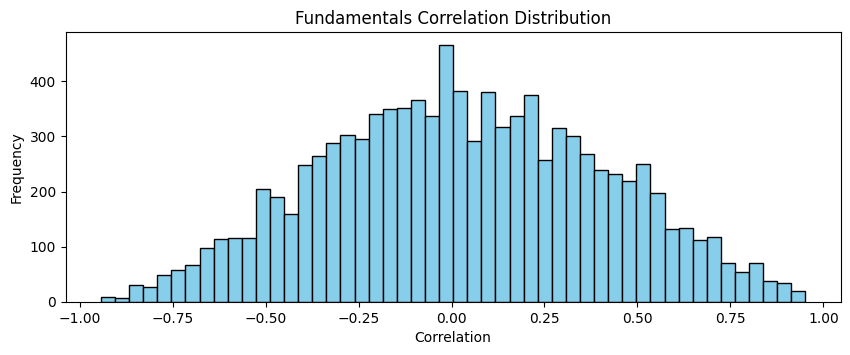

In [9]:
plt.figure(figsize=(10, 3.5))
plt.hist(fundamentals_corr.values.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Fundamentals Correlation Distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

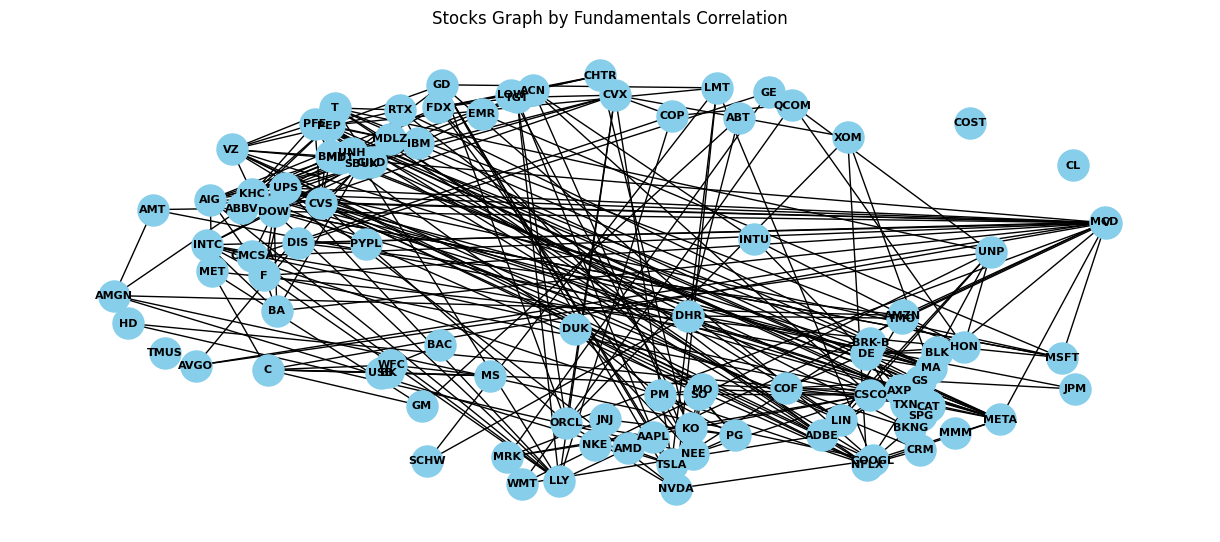

In [10]:
fundamentals_corr_np = fundamentals_corr.to_numpy()
adj_fundamentals_corr = (fundamentals_corr_np * (abs(fundamentals_corr_np) > .7).astype(int))

fundamentals_corr_graph = nx.from_numpy_array(adj_fundamentals_corr)
fundamentals_corr_graph = nx.relabel_nodes(fundamentals_corr_graph, dict(enumerate(fundamentals_corr.index)))

plt.figure(figsize=(12, 5))
nx.draw(fundamentals_corr_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(fundamentals_corr_graph))
plt.title('Stocks Graph by Fundamentals Correlation')
plt.show()

### Merging the Graph

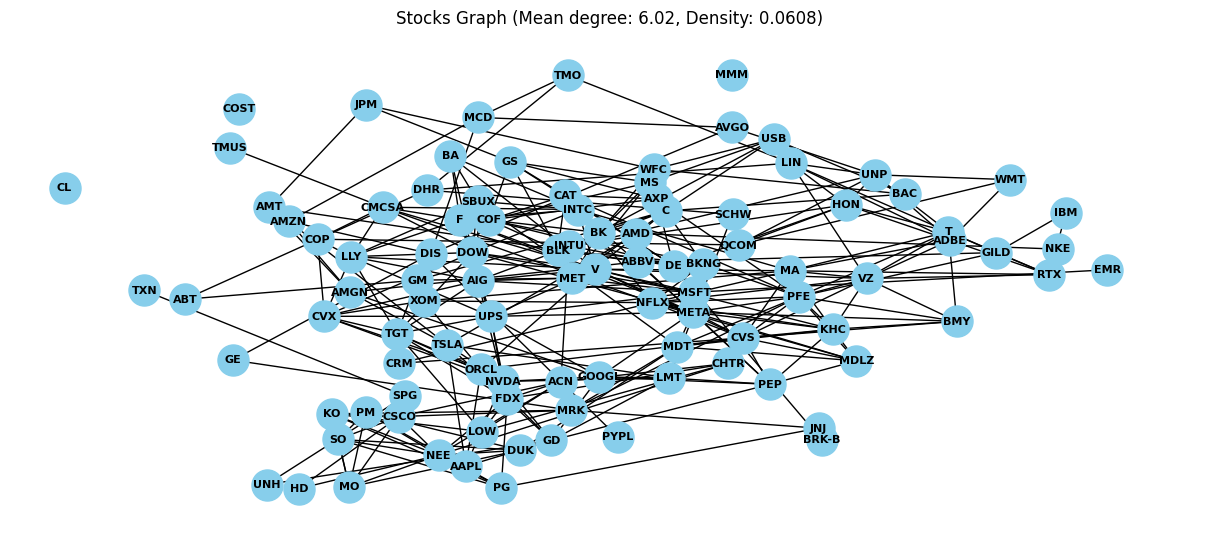

In [11]:
corr_threshold, sector_bonus = .7, .05

share_sector = pd.get_dummies(stocks[["Sector"]]).transpose().corr().to_numpy().astype(int) - np.eye(len(stocks), dtype=int)
# abs because GCNConv only accepts positive weights
adj = abs(fundamentals_corr_np) + share_sector * sector_bonus
adj = adj * (abs(adj) > corr_threshold)  
adj = adj / adj.max()

# 使用NetworkX将邻接矩阵 adj 转换为无向图。
# 矩阵中的非零值表示节点之间的边（Edge），边的权重来自 adj
graph = nx.from_numpy_array(adj)

# 将节点的索引（默认从0开始）重命名为股票的 index（股票代码）。
graph = nx.relabel_nodes(graph, dict(enumerate(stocks.index)))

plt.figure(figsize=(12, 5))
nx.draw(graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(graph, k=.5))
plt.title(f'Stocks Graph (Mean degree: {np.mean([degree for node, degree in graph.degree]):.2f}, Density: {nx.density(graph):.4f})')
plt.show()

In [12]:
# 遍历每个节点及其邻居，打印边的权重值
print("Node-to-Node Edge Weights:\n")

# NetworkX 的 `graph` 包含节点、边和权重信息
for node1, neighbors in graph.adjacency():
    for node2, attributes in neighbors.items():
        weight = attributes.get('weight', 0)  # 提取边的权重
        print(f"Edge from {node1} to {node2} has weight: {weight:.4f}")


Node-to-Node Edge Weights:

Edge from AAPL to GD has weight: 0.7736
Edge from AAPL to NVDA has weight: 0.9251
Edge from AAPL to ORCL has weight: 0.7840
Edge from AAPL to TSLA has weight: 0.7074
Edge from ABBV to AMGN has weight: 0.8810
Edge from ABBV to AMT has weight: 0.7736
Edge from ABBV to GILD has weight: 0.8237
Edge from ABBV to PEP has weight: 0.7030
Edge from ABT to DHR has weight: 0.8193
Edge from ABT to GM has weight: 0.7647
Edge from ACN to CHTR has weight: 0.9190
Edge from ACN to CSCO has weight: 0.8501
Edge from ACN to FDX has weight: 0.8485
Edge from ACN to INTU has weight: 0.8501
Edge from ACN to LOW has weight: 0.7603
Edge from ACN to NEE has weight: 0.7956
Edge from ADBE to HON has weight: 0.7118
Edge from ADBE to LIN has weight: 0.8793
Edge from ADBE to MA has weight: 0.8325
Edge from ADBE to RTX has weight: 0.8176
Edge from ADBE to T has weight: 0.8793
Edge from ADBE to UNP has weight: 0.8264
Edge from ADBE to VZ has weight: 0.8309
Edge from ADBE to WMT has weight: 0

In [13]:
import pandas as pd

# 存储每个节点与其权重最大相邻节点的pair和权重
max_weight_pairs = []

# 遍历图的每个节点及其邻居，找出权重最高的边
for node1, neighbors in graph.adjacency():
    max_node = None
    max_weight = -1  # 初始权重设为-1，确保所有边权重都能比较
    
    for node2, attributes in neighbors.items():
        weight = attributes.get('weight', 0)  # 提取边的权重
        if weight > max_weight:
            max_weight = weight
            max_node = node2  # 更新权重最大的节点

    # 保存当前节点及其最大权重的相邻节点和权重
    if max_node is not None:
        max_weight_pairs.append((node1, max_node, max_weight))

# 打印结果
print("Node Pairs with Maximum Edge Weights:")
for node1, max_node, weight in max_weight_pairs:
    print(f"{node1} -> {max_node} (Weight: {weight:.4f})")

# 保存结果到CSV文件
# output_df = pd.DataFrame(max_weight_pairs, columns=["Node", "Max_Weight_Node", "Weight"])
# output_file = "max_edge_weights.csv"
# output_df.to_csv(output_file, index=False)
# print(f"\nResults saved to {output_file}")


Node Pairs with Maximum Edge Weights:
AAPL -> NVDA (Weight: 0.9251)
ABBV -> AMGN (Weight: 0.8810)
ABT -> DHR (Weight: 0.8193)
ACN -> CHTR (Weight: 0.9190)
ADBE -> LIN (Weight: 0.8793)
AIG -> UPS (Weight: 0.9058)
AMD -> TSLA (Weight: 0.7207)
AMGN -> ABBV (Weight: 0.8810)
AMT -> JPM (Weight: 0.8617)
AMZN -> TSLA (Weight: 0.8722)
AVGO -> DIS (Weight: 0.7471)
AXP -> COF (Weight: 0.9074)
BA -> INTC (Weight: 0.8970)
BAC -> WFC (Weight: 0.9559)
BK -> MS (Weight: 1.0000)
BKNG -> DE (Weight: 0.8397)
BLK -> BKNG (Weight: 0.8353)
BMY -> CVS (Weight: 0.8413)
BRK-B -> DE (Weight: 0.7339)
C -> MET (Weight: 0.8590)
CAT -> GS (Weight: 0.8617)
CHTR -> ACN (Weight: 0.9190)
CMCSA -> LLY (Weight: 0.9102)
COF -> GS (Weight: 0.9118)
COP -> LLY (Weight: 0.8353)
CRM -> CVS (Weight: 0.7207)
CSCO -> NEE (Weight: 0.8705)
CVS -> KHC (Weight: 0.9543)
CVX -> TGT (Weight: 0.9014)
DE -> HON (Weight: 0.8766)
DHR -> ABT (Weight: 0.8193)
DIS -> GE (Weight: 0.8220)
DOW -> F (Weight: 0.9455)
DUK -> SO (Weight: 1.0000)
EMR